In [2]:
genKidsV = function(bTimes, cTimes, parentID, lambda = 0.5, kappa = 0.3) {
       # Determine how many children each job has
  parentAge = cTimes - bTimes
  numKids = rpois(n = length(parentAge), lambda = lambda * parentAge)
  
  if (sum(numKids) == 0) return(NULL)
  
       # Determine the birth times of the children  
  kidStats = 
    mapply(function(n, min, max) {
      births = sort(runif(n, min, max))
      runtimes = rexp(n, rate = kappa)
      completes = rep(max, n) + runtimes
      data.frame(births, completes)
    },
           n = numKids , min = bTimes, max = cTimes, 
           SIMPLIFY = FALSE)
  
 
  return(data.frame(parentID = rep(parentID, numKids),
                    kidID = 1:sum(numKids), 
                    births = unlist(lapply(kidStats, "[[", "births")), 
                    completes = unlist(lapply(kidStats,"[[", "completes"))
                    ))
}

In [3]:
familyTree = function(lambda = 0.5, kappa = 0.3, maxGen = 10) {
  # maxGen - maximum number of generations to observe
  # Return value - a list with 1 data frame per generation.
  allGens = vector(mode = "list", length = maxGen)
  
  # Generate the root of the tree
  allGens[[1]] = data.frame(parentID = NA, kidID = 1, births = 0,
                            completes = rexp(1, rate = kappa))
  
  # Generate future generations, one at a time.
  for (i in 2:maxGen) {
    nextGen = genKidsV(bTimes = allGens[[ (i - 1) ]]$births,
                       cTimes = allGens[[ (i - 1) ]]$completes,
                       parentID = allGens[[ (i - 1) ]]$kidID,
                       lambda = lambda, kappa = kappa)
    if (is.null(nextGen)) return(allGens[ 1:(i - 1) ])
    allGens[[ i ]] = nextGen
  }
  
  return(allGens)
}

In [4]:
seed1 = 12062013
set.seed(seed1)
tree = familyTree(lambda = 0.4, kappa = 1, maxGen = 10)

Warning message in is.na(nextGen$births):
“is.na() applied to non-(list or vector) of type 'NULL'”

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

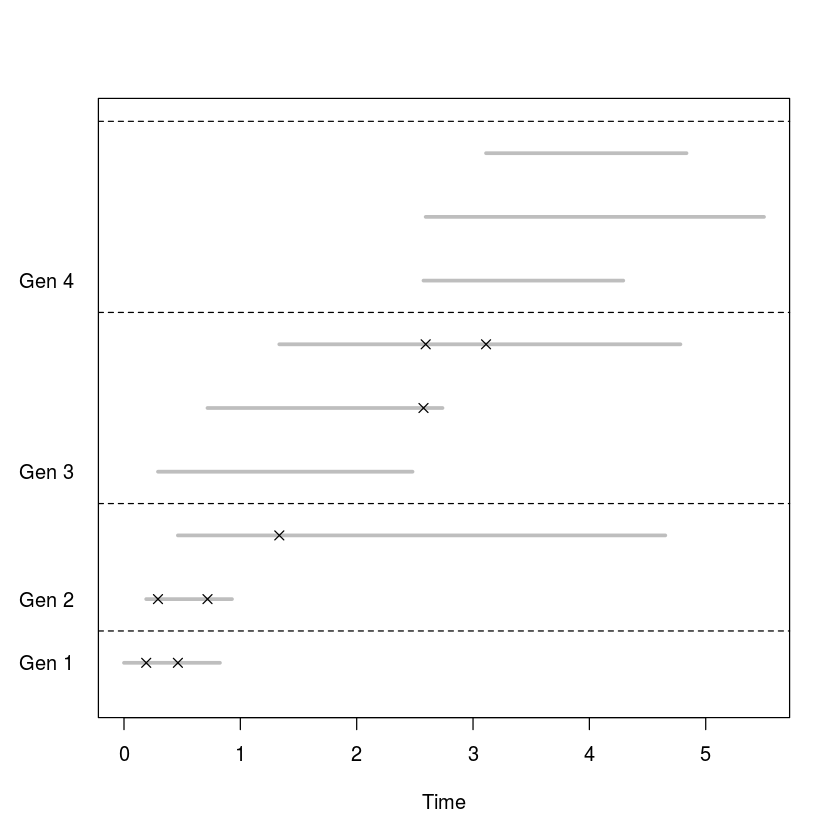

In [5]:
set.seed(seed1)
g = familyTree(lambda = 0.4, kappa = 1, maxGen = 10)

maxLife = max(sapply(g, function(gen) max(gen$completes)))
numFamily = sum(sapply(g, nrow))

plot(0,0, ylim = c(0.5, numFamily + 0.5), xlim = c(0, maxLife),
     xlab = "Time", ylab = "", type ="n",
     axes = FALSE)

box()
axis(1)
numGen = length(g)
numKids = sapply(g, nrow)
treeN = g[ 2:(numGen + 1) ]
birthNum = c(0, cumsum(sapply(g, nrow))[ -length(g)])
axis(2, at = birthNum + 1, 
     labels = paste("Gen", 1:numGen), tick = FALSE, las = 1)

mapply(function(gen, nextGen, birthNum) {
  birthOrder = birthNum + (1:nrow(gen))
  segments(x0 = gen$births, x1 = gen$completes, y0 = birthOrder,
          lwd = 3, col = "grey")
  abline(h = 0.5 + max(birthOrder), lty = 2, col="black" )
  if (all(!is.na(nextGen$births)))
  points(x = nextGen$births, y = birthOrder[nextGen$parentID],
         pch = 4)
  },
  gen = g, nextGen = treeN, birthNum = birthNum )

# Dan's Workspace


Warning message in is.na(nextGen$births):
"is.na() applied to non-(list or vector) of type 'NULL'"

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

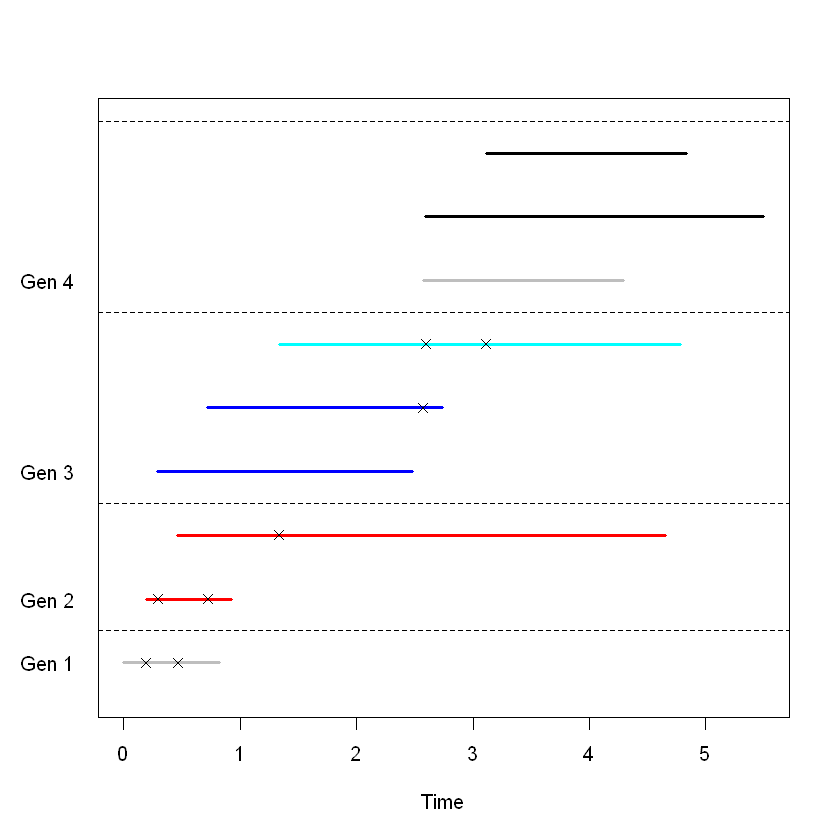

In [5]:
plot(0,0, ylim = c(0.5, numFamily + 0.5), xlim = c(0, maxLife),
     xlab = "Time", ylab = "", type ="n",
     axes = FALSE)

box()
axis(1)
numGen = length(g)
numKids = sapply(g, nrow)
treeN = g[ 2:(numGen + 1) ]
birthNum = c(0, cumsum(sapply(g, nrow))[ -length(g)])
axis(2, at = birthNum + 1, 
     labels = paste("Gen", 1:numGen), tick = FALSE, las = 1)

mapply(function(gen, nextGen, birthNum) {
  birthOrder = birthNum + (1:nrow(gen))
  if (nrow(gen) == 1){
    segments(x0 = gen$births, x1 = gen$completes, y0 = birthOrder,
            lwd = 3, col = "grey")    
  }
  else {
    segments(x0 = gen$births, x1 = gen$completes, y0 = birthOrder,
            lwd = 3, col = birthOrder[gen$parentID])
  }
  abline(h = 0.5 + max(birthOrder), lty = 2, col="black" )
  if (all(!is.na(nextGen$births)))
  points(x = nextGen$births, y = birthOrder[nextGen$parentID],
         pch = 4)
  },
  gen = g, nextGen = treeN, birthNum = birthNum )

# Sudip's Workspace

Warning message in is.na(nextGen$births):
“is.na() applied to non-(list or vector) of type 'NULL'”

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

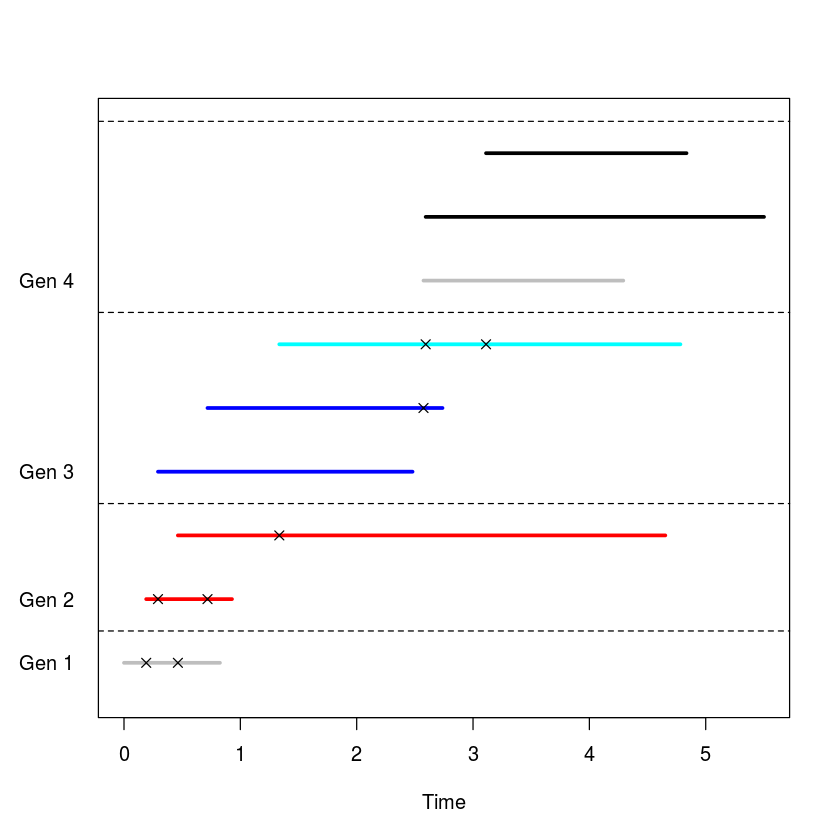

In [6]:
plot(0,0, ylim = c(0.5, numFamily + 0.5), xlim = c(0, maxLife),
     xlab = "Time", ylab = "", type ="n",
     axes = FALSE)

box()
axis(1)
numGen = length(g)
numKids = sapply(g, nrow)
treeN = g[ 2:(numGen + 1) ]
birthNum = c(0, cumsum(sapply(g, nrow))[ -length(g)])
axis(2, at = birthNum + 1, 
     labels = paste("Gen", 1:numGen), tick = FALSE, las = 1)

mapply(function(gen, nextGen, birthNum) {
  birthOrder = birthNum + (1:nrow(gen))
  if (nrow(gen) == 1){
    segments(x0 = gen$births, x1 = gen$completes, y0 = birthOrder,
            lwd = 3, col = "grey")    
  }
  else {
    segments(x0 = gen$births, x1 = gen$completes, y0 = birthOrder,
            lwd = 3, col = birthOrder[gen$parentID])
  }
  abline(h = 0.5 + max(birthOrder), lty = 2, col="black" )
  if (all(!is.na(nextGen$births)))
  points(x = nextGen$births, y = birthOrder[nextGen$parentID],
         pch = 4)
  },
  gen = g, nextGen = treeN, birthNum = birthNum )

# Tim's Workspace

Warning message in is.na(nextGen$births):
“is.na() applied to non-(list or vector) of type 'NULL'”

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

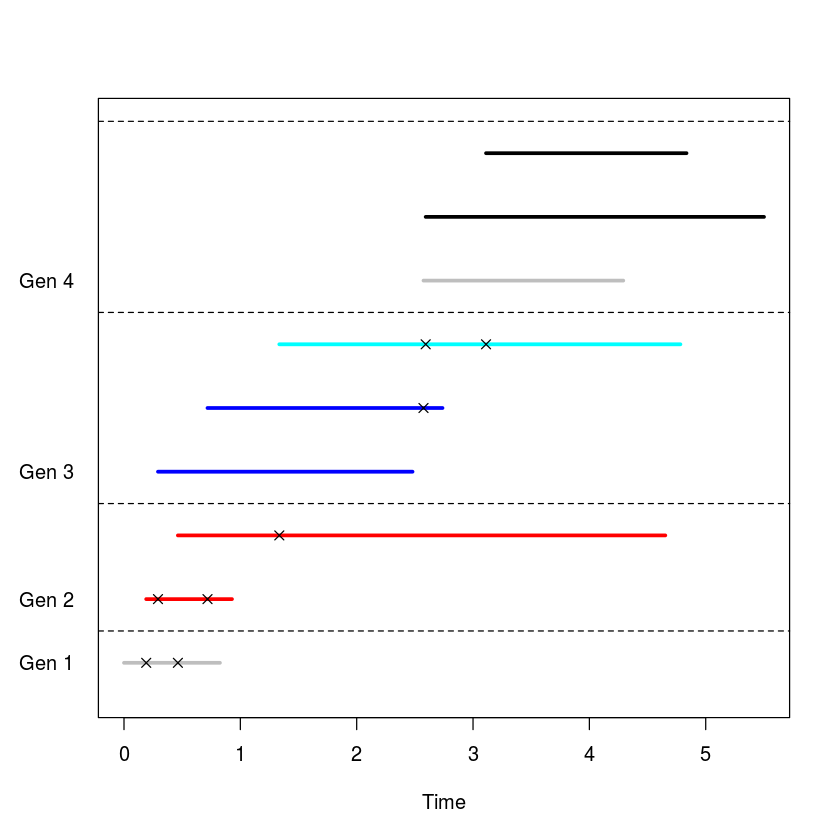

In [8]:
plot(0,0, ylim = c(0.5, numFamily + 0.5), xlim = c(0, maxLife),
     xlab = "Time", ylab = "", type ="n",
     axes = FALSE)

box()
axis(1)
numGen = length(g)
numKids = sapply(g, nrow)
treeN = g[ 2:(numGen + 1) ]
birthNum = c(0, cumsum(sapply(g, nrow))[ -length(g)])
axis(2, at = birthNum + 1, 
     labels = paste("Gen", 1:numGen), tick = FALSE, las = 1)

mapply(function(gen, nextGen, birthNum) {
  birthOrder = birthNum + (1:nrow(gen))
  if (nrow(gen) == 1){
    segments(x0 = gen$births, x1 = gen$completes, y0 = birthOrder,
            lwd = 3, col = "grey")    
  }
  else {
    segments(x0 = gen$births, x1 = gen$completes, y0 = birthOrder,
            lwd = 3, col = birthOrder[gen$parentID])
  }
  abline(h = 0.5 + max(birthOrder), lty = 2, col="black" )
  if (all(!is.na(nextGen$births)))
  points(x = nextGen$births, y = birthOrder[nextGen$parentID],
         pch = 4)
  },
  gen = g, nextGen = treeN, birthNum = birthNum )